# need to concat all the plate runs

TODO
- need a new parsing method for the plates (what will the output format be?)
- figures take a long time to generate
- need to pool all curves together into a database
- better method to parse the well time

In [1]:
import pandas as pd
import seaborn as sns
sns.set_context("talk")
import matplotlib.pyplot as plt
%matplotlib inline

# working with blank corrected
df = pd.read_csv('200128_corr.CSV')

# manage cycles and time
df['min'] = df['Time'].str.split(' ').str[2]
df['min'].replace('',0,inplace=True)
df['min'] = df['min'].astype(int)
df['hr'] = df['Time'].str.split(' ').str[0].astype(int)*60
df['time_min'] = df['hr'] + df['min']

wells = df.columns.tolist()[2:-3]
df1 = pd.melt(df,id_vars='time_min',value_vars=wells,var_name='well',value_name='od')
df1.rename(columns={'time_min':'time'},inplace=True)
samples = [
    'YCp50-RD',
    'PKR + K3L',
    'PKR + K3L H47R',
    'PKR D486V + K3L',
    'PKR D486V + K3L H47R',
    'PKR',
    'PKR D486V'
]

# samples
df1['sample'] = df1['well'].map(dict(zip(wells,[s for s in samples for i in range(8)])))
# colony
df1['colony'] = df1['well'].map(dict(zip(wells,[c for c in ['c1','c2'] for i in range(2)]*14)))
# replicate
df1['replicate'] = df1['well'].map(dict(zip(wells,[r for r in ['r1','r2']*28])))
# media
df1['media'] = df1['well'].map(dict(zip(wells,[m for m in ['Glucose','Galactose'] for i in range(4)]*7)))
df1['date'] = '200128'

In [3]:
df1.shape

(16800, 8)

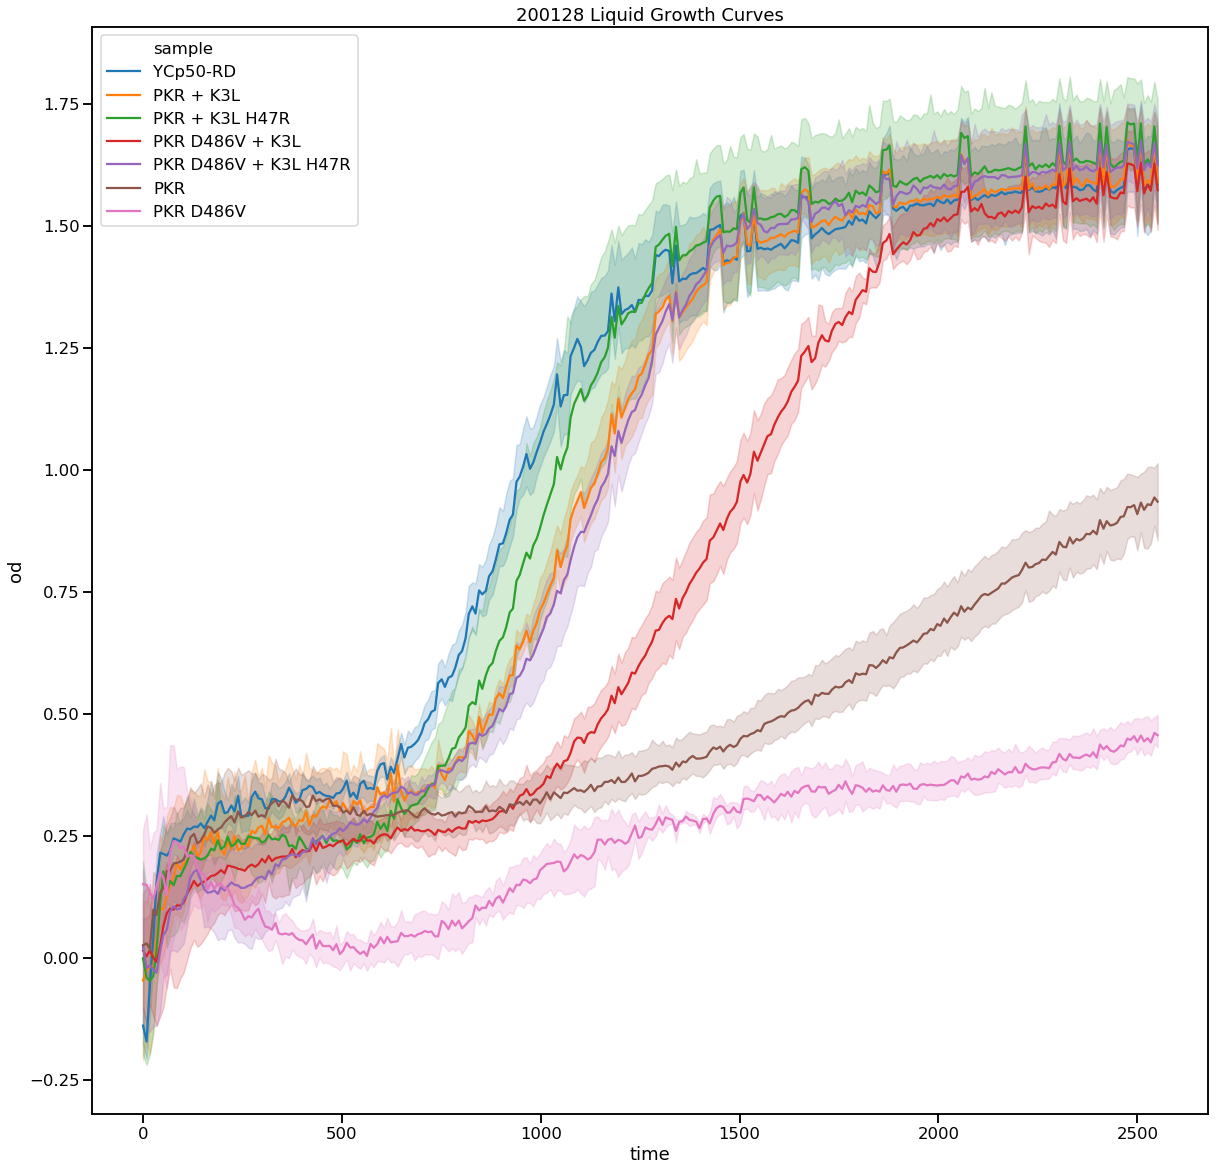

In [3]:
# figure
plt.figure(figsize=(20,20))
ax = sns.lineplot(x='time', y='od', hue='sample', data=df1[df1['media'] == 'Galactose']).set_title('200128 Liquid Growth Curves')
fig = ax.get_figure()
#fig.savefig('200128_liq-growth.png')

In [4]:
# import 200204 data
# has a different sample layout

# working with blank corrected
df = pd.read_csv('200204_corrected_out.csv')

df['cycle'] = df['time'].str.split(" ", 2).str[:2].str.join(" ")


# there's a problem with the cycles missing minute values (index [102,167,308] for 200204_corrected data)
#df.iloc[df[df['time'].str.split(" ",2).str[2].str.split(" ").str[2].isna()].index.tolist()]

# this is a shit line
df['time'] = df['time'].str.split(" ",2).str[2].str.split(" ").str[0].str[1:].astype(int) * 60 + df['time'].str.split(" ",2).str[2].str.split(" ").str[2].fillna(value=0).astype(int)

# manage cycles and time

# may need to cut this
"""df['min'] = df['time'].str.split(' ').str[2]
df['min'].replace('',0,inplace=True)
df['min'] = df['min'].astype(int)
df['hr'] = df['time'].str.split(' ').str[0].astype(int)*60
df['time_min'] = df['hr'] + df['min']"""

wells = df.columns.tolist()[1:-1]
df2 = pd.melt(df,id_vars='time',value_vars=wells,var_name='well',value_name='od')


# now slice the well data
samples = [
    'YCp50-RD', #1_A
    'YCp50-RD', #1_B
    'K3L',
    'K3L',
    'K3L H47R',
    'PKR',
    'PKR',
    'PKR D486V',
    'PKR D486V',
    'PKR + K3L',
    'BLANK',
    'PKR + K3L H47R',
    'BLANK',
    'PKR D486V + K3L',
    'BLANK',
    'PKR D486V + K3L H47R',
]

# samples
df2['sample'] = df2['well'].map(dict(zip(wells,[s for s in samples for i in range(6)])))

# no colonies replicated in 200204 experiment

# replicate
df2['replicate'] = df2['well'].map(dict(zip(wells,[r for r in ['r1','r2','r3']*28])))

# media
df2['media'] = df2['well'].map(dict(zip(wells,[m for m in ['Glucose','Galactose'] for i in range(3)]*16)))

df2['date'] = '200204'

In [12]:
df1.shape

(16800, 8)

In [10]:
df1.head()

,time,well,od,sample,colony,replicate,media,date
0,0,A01,-0.079,YCp50-RD,c1,r1,Glucose,200128
1,9,A01,-0.106,YCp50-RD,c1,r1,Glucose,200128
2,17,A01,-0.130,YCp50-RD,c1,r1,Glucose,200128
3,26,A01,-0.150,YCp50-RD,c1,r1,Glucose,200128
4,34,A01,-0.161,YCp50-RD,c1,r1,Glucose,200128


In [13]:
df2.shape

(43104, 7)

In [11]:
df2.head()

,time,well,od,sample,replicate,media,date
0,2484,A1,1.642,YCp50-RD,r1,Glucose,200204
1,2479,A1,1.643,YCp50-RD,r1,Glucose,200204
2,2473,A1,1.650,YCp50-RD,r1,Glucose,200204
3,2468,A1,1.644,YCp50-RD,r1,Glucose,200204
4,2462,A1,1.638,YCp50-RD,r1,Glucose,200204


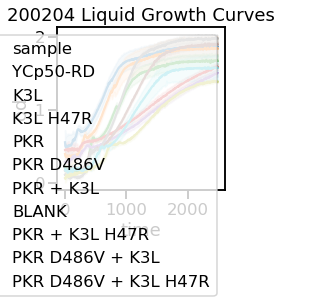

In [19]:
#plt.figure(figsize=(20,20))
plt.figure(figsize=(3,3))

ax = sns.lineplot(
    x='time', 
    y='od', 
    hue='sample', 
    data=df1[df1['media'] == 'Galactose']
)
ax.set_title('200204 Liquid Growth Curves')
fig = ax.get_figure()
#fig.savefig('200204_liq-growth.png')

In [11]:
# I THINK THIS IS INCORRECT
# try and merge the pGAL-K3L (200128) data with pTDH3-K3L (200204) data

#200128 is df1

#200204 is df2
#df2 = df1

In [12]:
# then run the first cell again (this is shit)

In [15]:
df2.head()

,time,well,od,sample,replicate,media,date
0,2484,A1,1.642,YCp50-RD,r1,Glucose,200204
1,2479,A1,1.643,YCp50-RD,r1,Glucose,200204
2,2473,A1,1.650,YCp50-RD,r1,Glucose,200204
3,2468,A1,1.644,YCp50-RD,r1,Glucose,200204
4,2462,A1,1.638,YCp50-RD,r1,Glucose,200204


In [14]:
df = pd.concat([df1,df2])

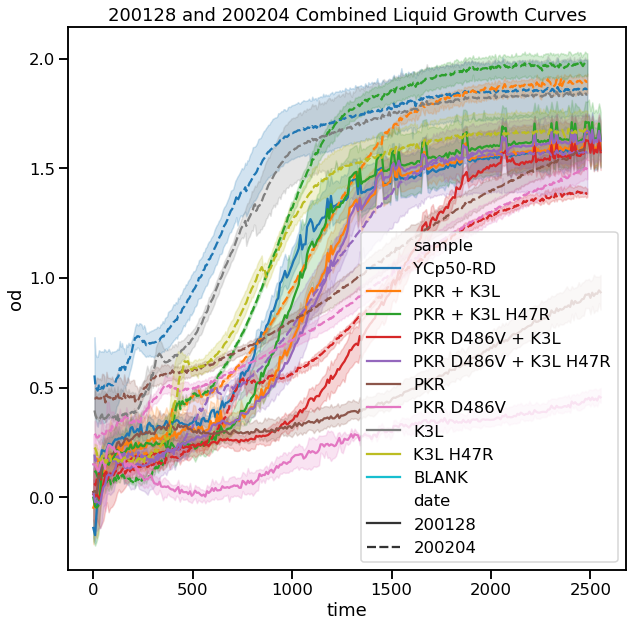

In [15]:
# everything
#plt.figure(figsize=(20,20))
plt.figure(figsize=(10,10))
ax = sns.lineplot(
    x='time', 
    y='od', 
    hue='sample', 
    style='date',
    data=df[df['media'] == 'Galactose']
)
ax.set_title('200128 and 200204 Combined Liquid Growth Curves')
fig = ax.get_figure()
#fig.savefig('200128-0204_combined-curves.png')

Text(0.5, 1.0, '200128 and 200204 Combined Liquid Growth Curves\nYCp50-RD (Blank Vector)')

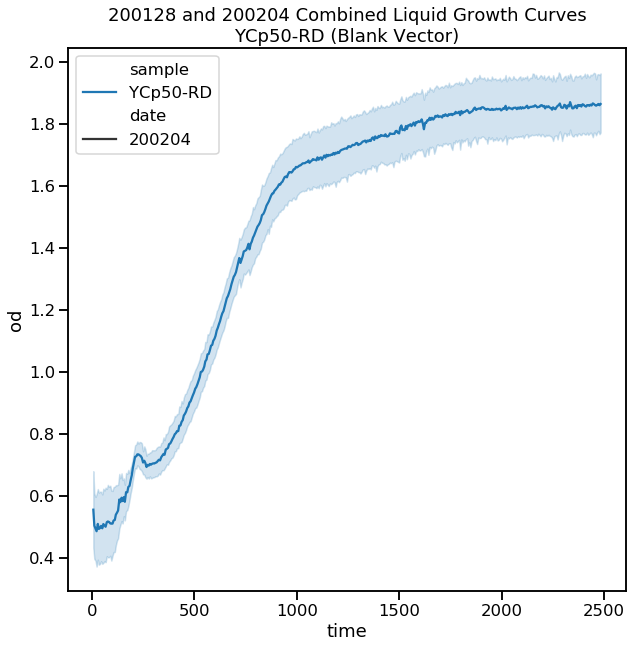

In [17]:
# just show ['YCp50-RD']
plt.figure(figsize=(10,10))
ax = sns.lineplot(
    x='time', 
    y='od', 
    hue='sample', 
    style='date',
    data=df[(df['sample'] == 'YCp50-RD') & (df['media'] == 'Galactose')]
)
ax.set_title('200128 and 200204 Combined Liquid Growth Curves\nYCp50-RD (Blank Vector)')
#fig = ax.get_figure()
#fig.savefig('200128-0204_YCp50-RD.png')

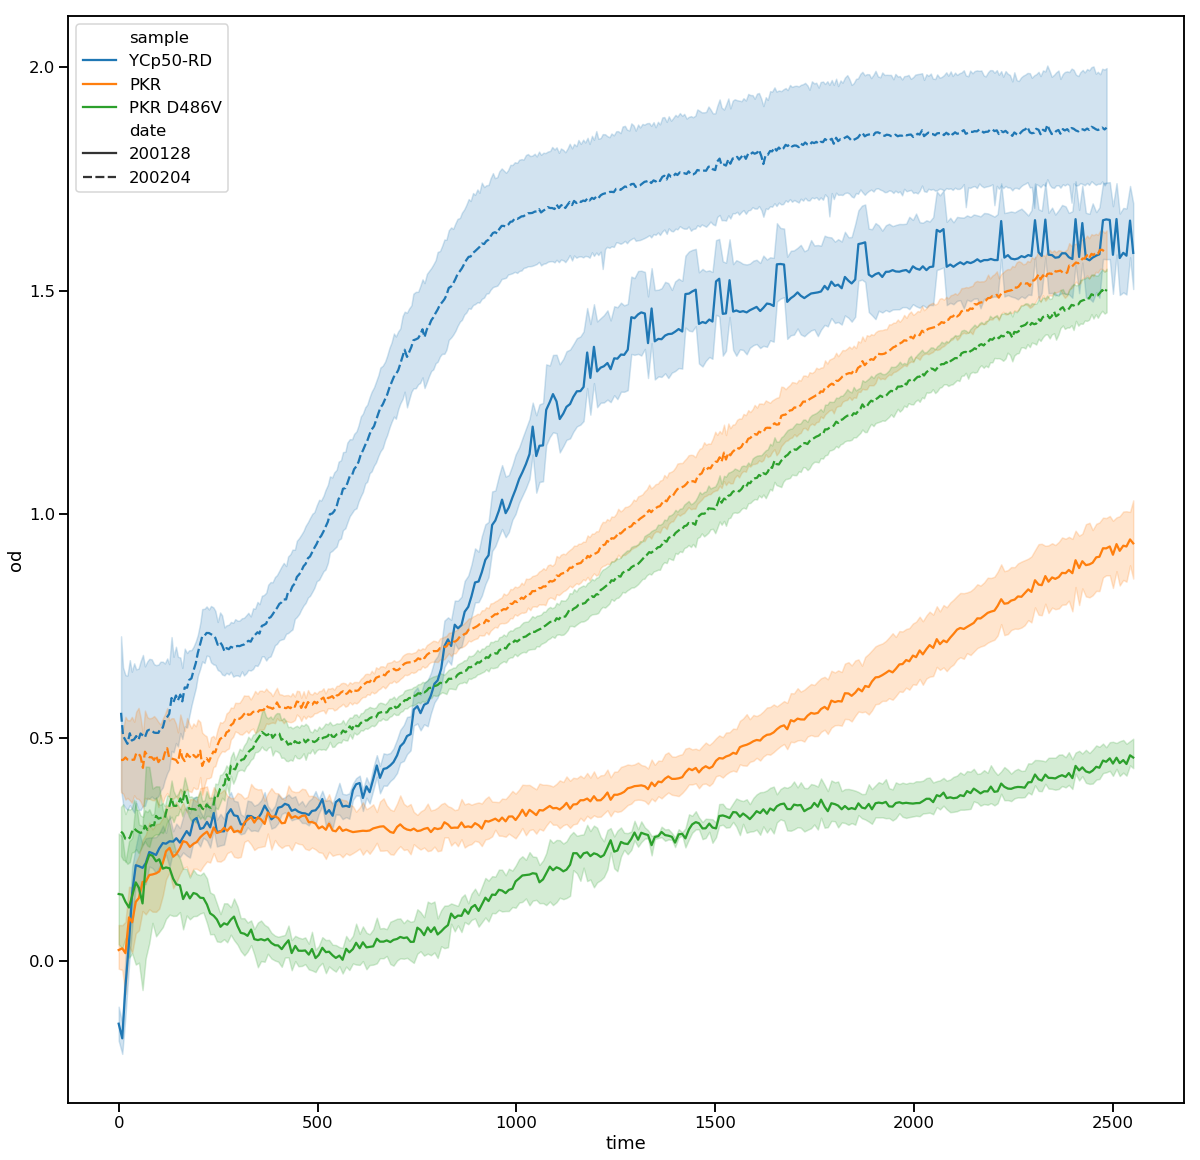

In [31]:
# ['YCp50-RD','K3L','K3L H47R','PKR','PKR D486V']
plt.figure(figsize=(20,20))
ax = sns.lineplot(
    x='time', 
    y='od', 
    hue='sample', 
    style='date',
    data=df[(df['sample'].isin(['YCp50-RD','PKR','PKR D486V'])) & (df['media'] == 'Galactose')]
)
ax.set_title('200128 and 200204 Combined Liquid Growth Curves\n Comparison of PKR Growth')
fig = ax.get_figure()
fig.savefig('200128-0204_PKR.png')

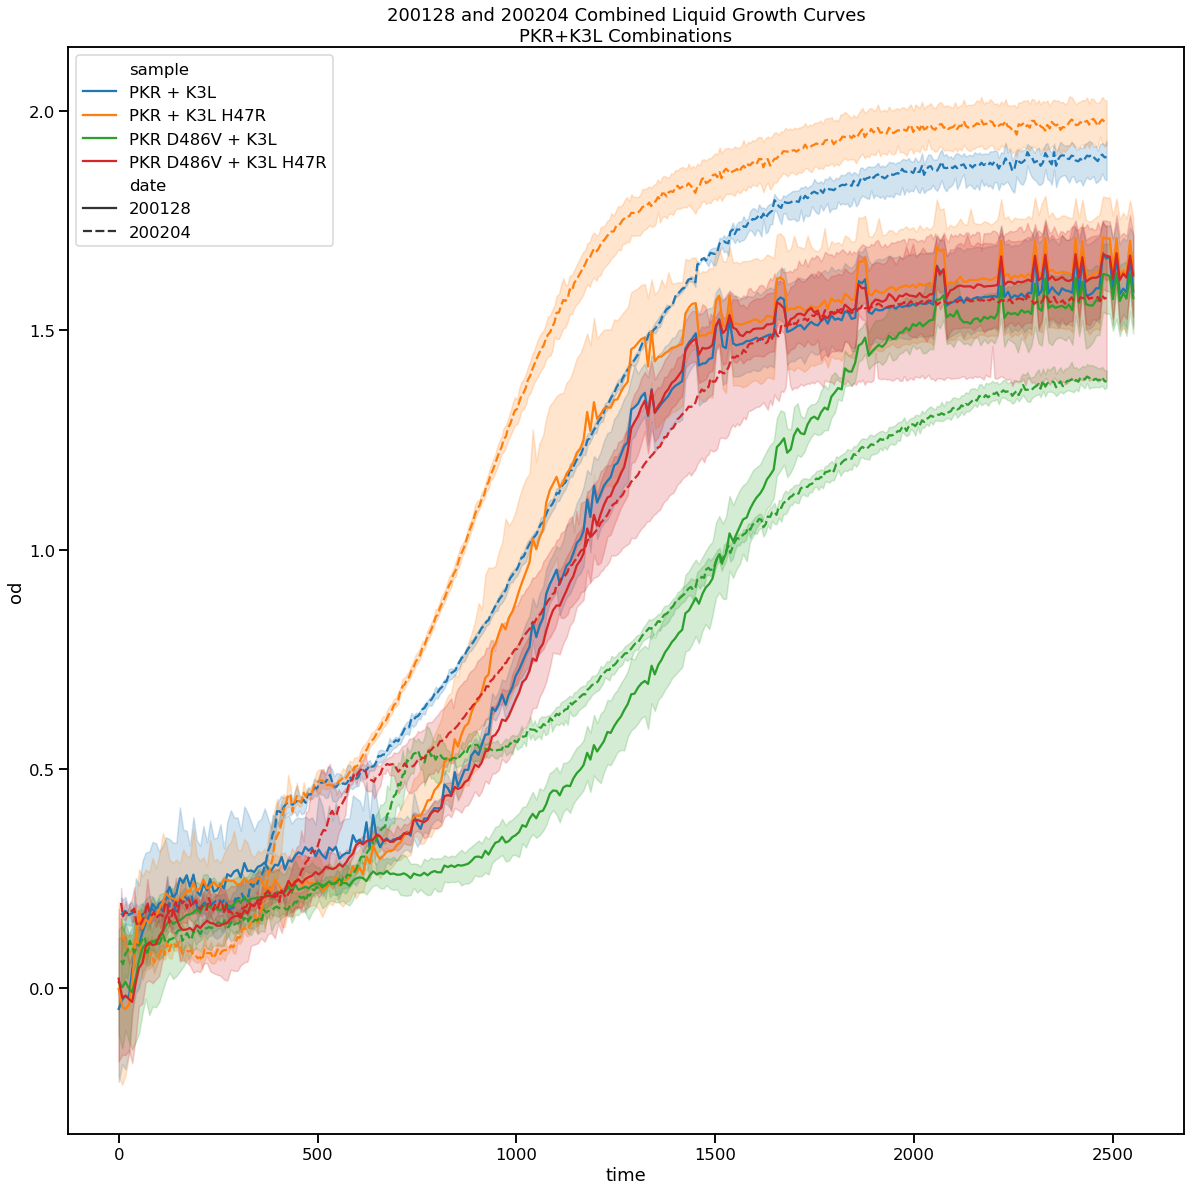

In [32]:
# comparion of combinations
plot_samples = ['PKR + K3L','PKR + K3L H47R','PKR D486V + K3L','PKR D486V + K3L H47R',]
plt.figure(figsize=(20,20))
ax = sns.lineplot(
    x='time', 
    y='od', 
    hue='sample', 
    style='date',
    data=df[(df['sample'].isin(plot_samples)) & (df['media'] == 'Galactose')]
)
ax.set_title('200128 and 200204 Combined Liquid Growth Curves\nPKR+K3L Combinations')
fig = ax.get_figure()
fig.savefig('200128-0204_PKR-K3L.png')

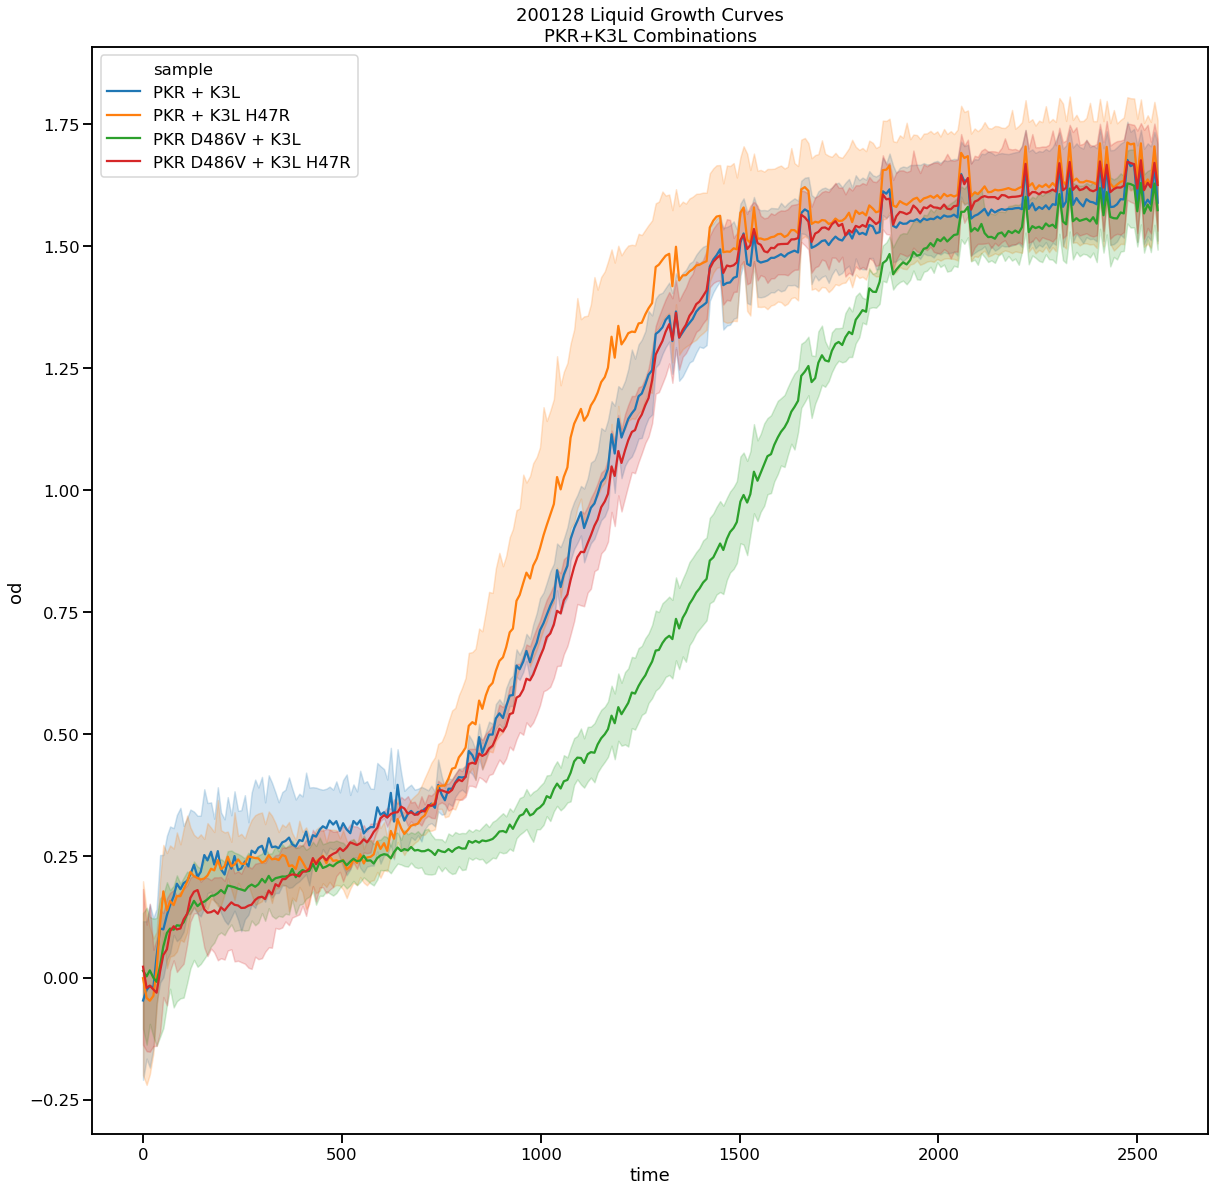

In [33]:
# just 020128 pGAL10/CYC1-K3L
plot_samples = ['PKR + K3L','PKR + K3L H47R','PKR D486V + K3L','PKR D486V + K3L H47R',]
sns.set_context("talk")
plt.figure(figsize=(20,20))
ax = sns.lineplot(
    x='time', 
    y='od', 
    hue='sample', 
    data=df[(df['sample'].isin(plot_samples)) & (df['media'] == 'Galactose') & (df['date'] == '200128')]
)
ax.set_title('200128 Liquid Growth Curves\nPKR+K3L Combinations')
fig = ax.get_figure()
fig.savefig('200128_PKR-K3L.png')

In [22]:
df1.head()

,time,well,od,sample,replicate,media,date
0,2484,A1,1.642,YCp50-RD,r1,Glucose,200204
1,2479,A1,1.643,YCp50-RD,r1,Glucose,200204
2,2473,A1,1.650,YCp50-RD,r1,Glucose,200204
3,2468,A1,1.644,YCp50-RD,r1,Glucose,200204
4,2462,A1,1.638,YCp50-RD,r1,Glucose,200204


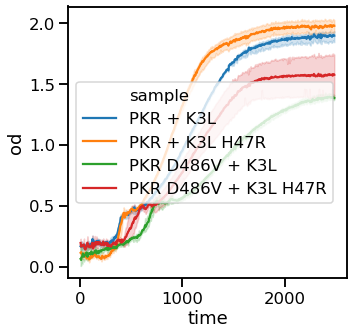

In [16]:
# just 020128 pTDH3-K3L
plot_samples = ['PKR + K3L','PKR + K3L H47R','PKR D486V + K3L','PKR D486V + K3L H47R',]
sns.set_context("talk")
plt.figure(figsize=(5,5))
sns.lineplot(
    x='time', 
    y='od', 
    hue='sample', 
    data=df[(df['sample'].isin(plot_samples)) & (df['media'] == 'Galactose') & (df['date'] == '200204')]
)
#ax.set_title('200204 Liquid Growth Curves\nPKR+K3L Combinations')
#fig = ax.get_figure()
#fig.savefig('200204_PKR-K3L.png')

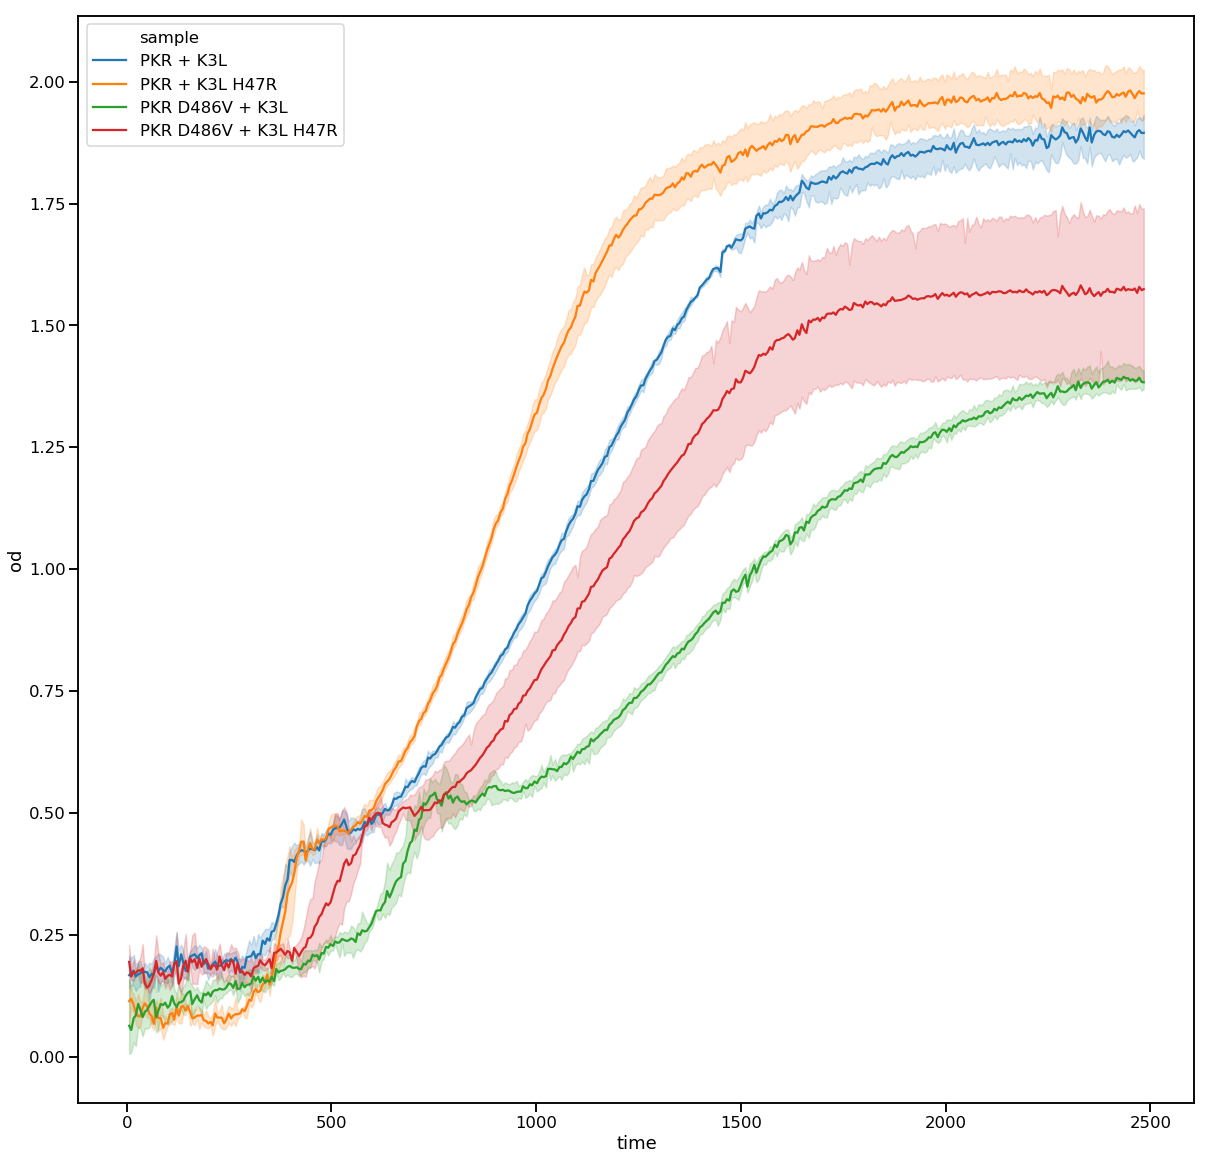

In [36]:
# just 020128 pTDH3-K3L
plot_samples = ['PKR + K3L','PKR + K3L H47R','PKR D486V + K3L','PKR D486V + K3L H47R',]
sns.set_context("talk")
plt.figure(figsize=(20,20))
sns.lineplot(
    x='time', 
    y='od', 
    hue='sample', 
    data=df[(df['sample'].isin(plot_samples)) & (df['media'] == 'Galactose') & (df['date'] == '200204')]
)
#ax.set_title('200204 Liquid Growth Curves\nPKR+K3L Combinations')
#fig = ax.get_figure()
#fig.savefig('200204_PKR-K3L.png')

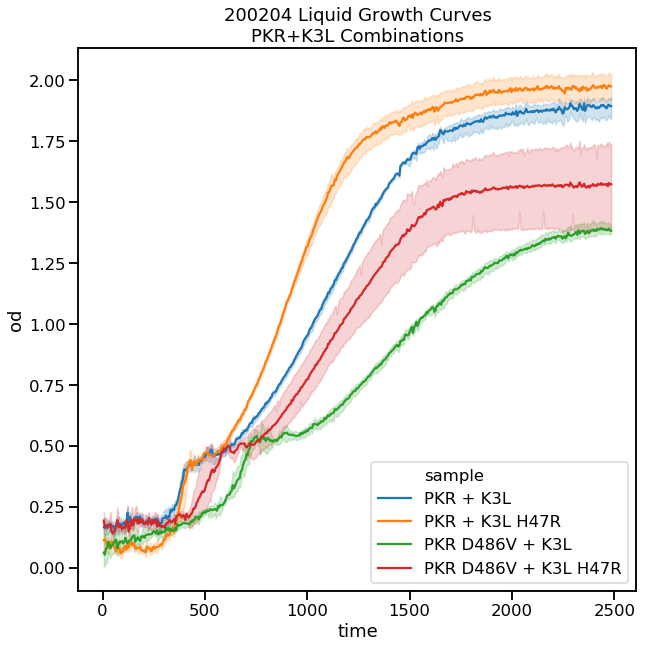

In [45]:
# just 020128 pTDH3-K3L
plot_samples = ['PKR + K3L','PKR + K3L H47R','PKR D486V + K3L','PKR D486V + K3L H47R',]
sns.set_context("talk")
plt.figure(figsize=(10,10))
ax = sns.lineplot(
    x='time', 
    y='od', 
    hue='sample', 
    data=df[
        (df['sample'].isin(plot_samples)) & 
        (df['media'] == 'Galactose') & 
        (df['date'] == '200204')
    ]
)
ax.set_title('200204 Liquid Growth Curves\nPKR+K3L Combinations')
fig = ax.get_figure()
fig.savefig('200204_PKR-K3L.svg', transparent=True)

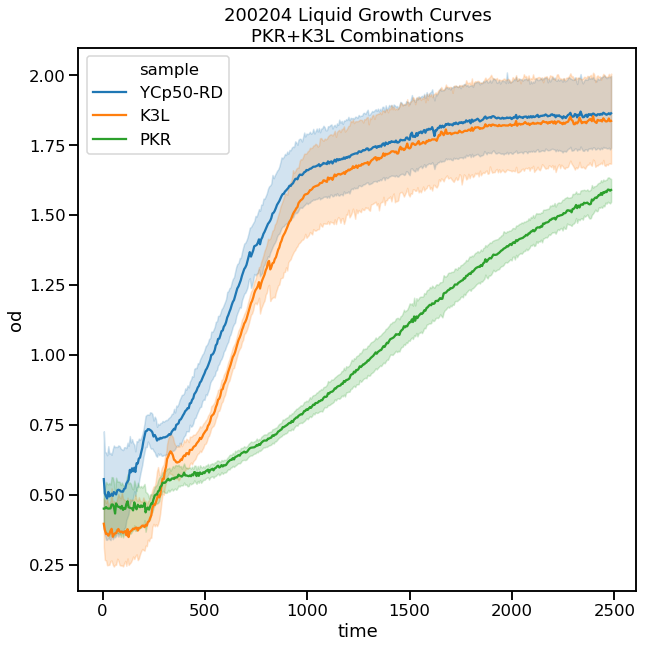

In [46]:
# just 020128 pTDH3-K3L
plot_samples = ['YCp50-RD','K3L','PKR']
sns.set_context("talk")
plt.figure(figsize=(10,10))
ax = sns.lineplot(
    x='time', 
    y='od', 
    hue='sample', 
    data=df[
        (df['sample'].isin(plot_samples)) & 
        (df['media'] == 'Galactose') & 
        (df['date'] == '200204')
    ]
)
ax.set_title('200204 Liquid Growth Curves\nPKR+K3L Combinations')
fig = ax.get_figure()
fig.savefig('200204_YCp50_PKR_K3L.svg', transparent=True)

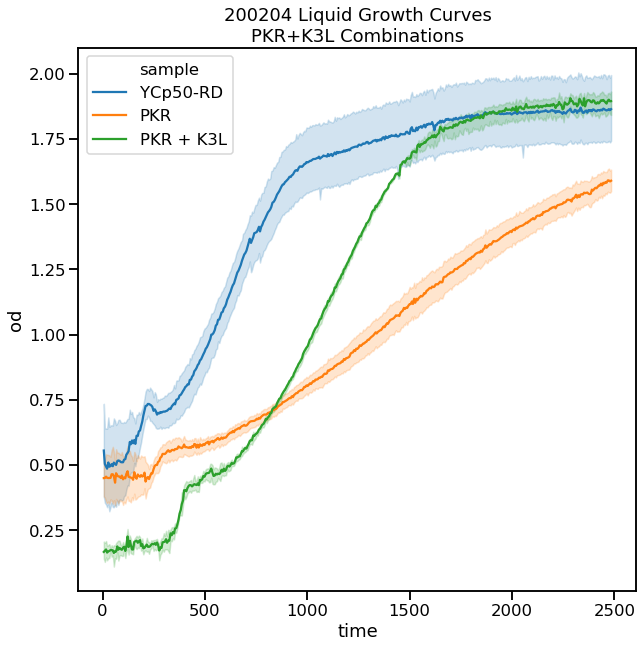

In [17]:
# figure for Comps Aim 1
plot_samples = ['YCp50-RD','PKR', 'PKR + K3L']
sns.set_context("talk")
plt.figure(figsize=(10,10))
ax = sns.lineplot(
    x='time', 
    y='od', 
    hue='sample', 
    data=df[
        (df['sample'].isin(plot_samples)) & 
        (df['media'] == 'Galactose') & 
        (df['date'] == '200204')
    ]
)
ax.set_title('200204 Liquid Growth Curves\nPKR+K3L Combinations')
fig = ax.get_figure()
fig.savefig('200204_YCp50_PKR_PKR-K3L.svg', transparent=True)